In [2]:
import pandas as pd
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [3]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [4]:
covid_data = covid_data.groupby(['date','country'], as_index=False)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
display(covid_data.tail())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17645,2020-03-17,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [6]:
covid_data['date'].dt.date.sort_values()
low_border = covid_data['date'].min()
top_border = covid_data['date'].max()
print(low_border, top_border)

2020-01-22 00:00:00 2021-05-29 00:00:00


In [7]:
print(vaccinations_data['date'].dt.date.sort_values()[0], vaccinations_data['date'].dt.date.sort_values()[-1:])
vaccinations_data['date'].dt.date.sort_values()

2021-02-22 41328    2021-09-06
Name: date, dtype: object


28893    2020-12-02
28894    2020-12-03
21214    2020-12-04
28895    2020-12-04
21215    2020-12-05
            ...    
29639    2021-09-06
6809     2021-09-06
30024    2021-09-06
36494    2021-09-06
41328    2021-09-06
Name: date, Length: 42795, dtype: object

In [8]:
covid_df = covid_data.merge(vaccinations_data[(vaccinations_data['date'] > low_border) & (vaccinations_data['date'] < top_border)],
    how='left',
    on=['date', 'country']
    )
display(covid_df.head())
display(covid_df.tail())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86784,2020-03-17,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
covid_df.shape

(86785, 16)

In [10]:
covid_df['lethal_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df[covid_df['country'] == 'United States']['lethal_rate'].max().round(2)


7.19

In [11]:
covid_df['recovery_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
covid_df[covid_df['country'] == 'Russia']['recovery_rate'].mean().round(2)

67.06

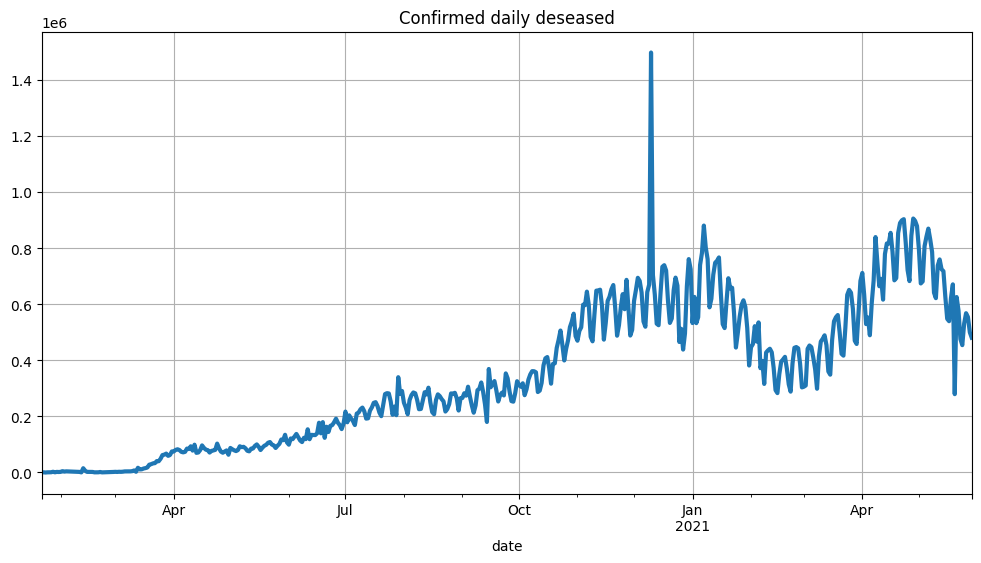

In [12]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind= 'line', figsize= (12,6),
    title= 'Confirmed daily deseased',
    grid= True, lw=3
);

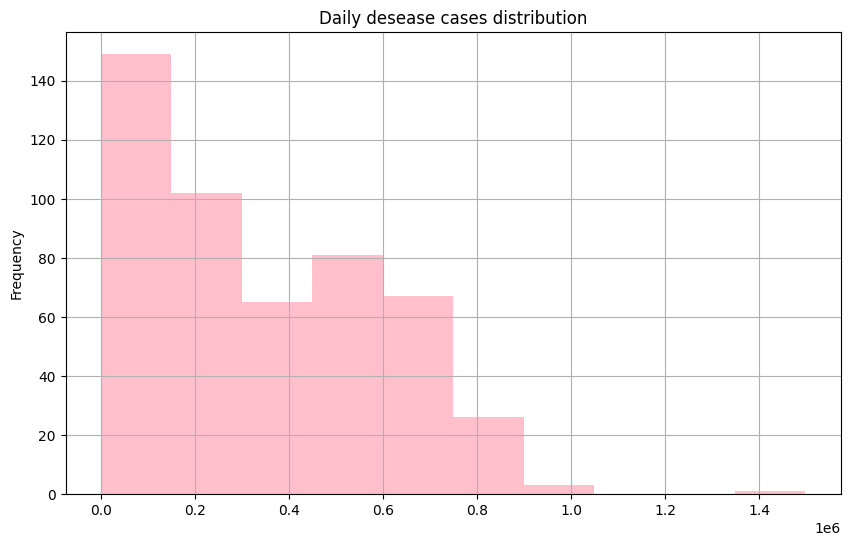

In [13]:
from turtle import color


grouped_cases.plot(
    kind= 'hist', figsize= (10, 6),
    title= 'Daily desease cases distribution',
    grid= True, color = 'pink',
    bins = 10
);

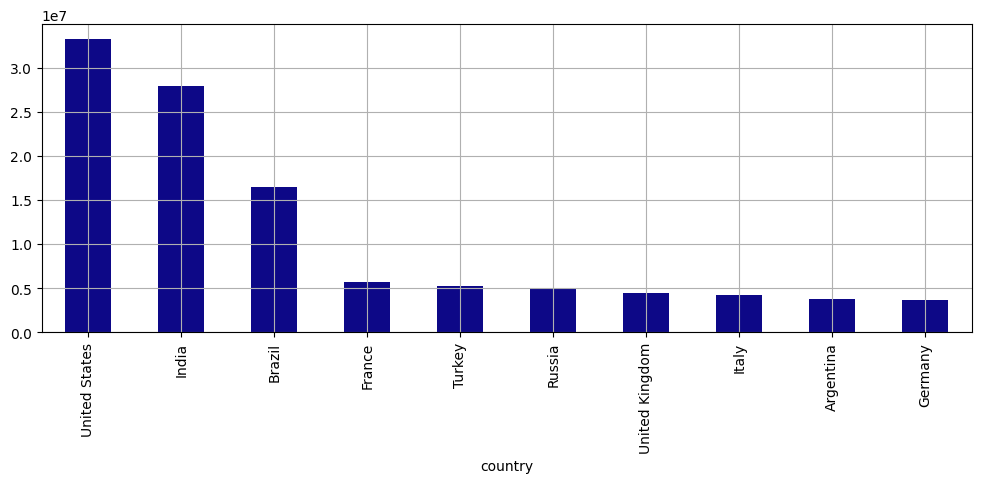

In [14]:
grouped_country = covid_df.groupby('country')['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind= 'bar', figsize= (12, 4),
    grid= True, colormap = 'plasma'
);

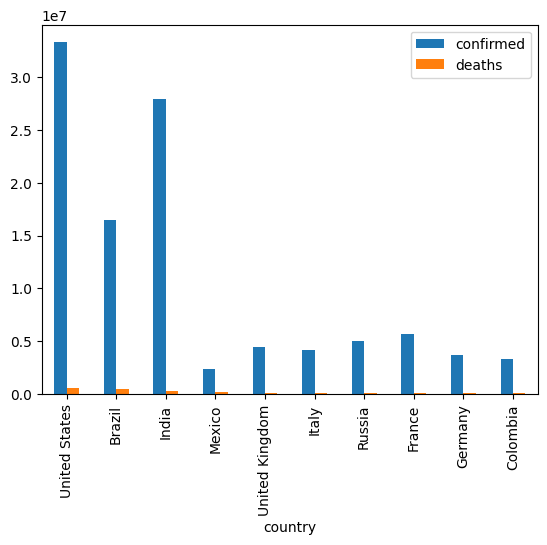

In [15]:
grouped_country = covid_df.groupby('country')[['confirmed','deaths']].last()
grouped_country = grouped_country.nlargest(10, columns= ['deaths'])
grouped_country.plot(
    kind= 'bar'
);

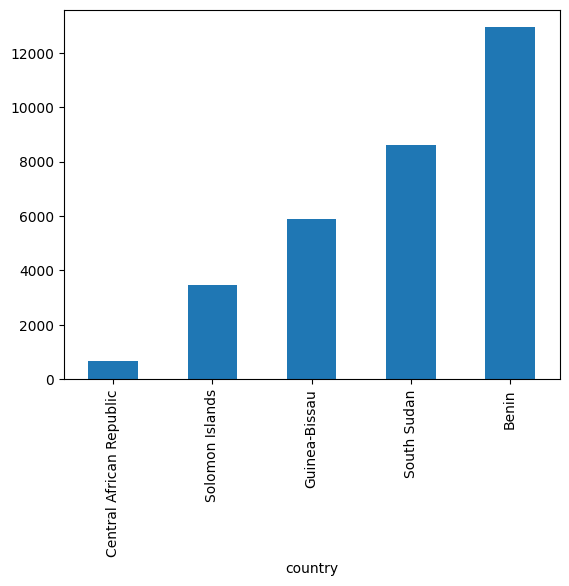

In [16]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

In [21]:
covid_df.to_csv('data/covid_df.csv')
